In [1]:
import os
import pandas as pd

read_path = os.getcwd()
df_url = read_path + '/Output/GoldDataframe.csv'

In [2]:
#import warnings
#warnings.filterwarnings("ignore")

In [3]:
#One dataframe per country

df = pd.read_csv(df_url)
corr_df = pd.DataFrame()
corr_df.index.names = ['Country']
aux_df = pd.DataFrame()

#List all the countries, none repeated
countries = set(df['Country'].to_list())

country_dict = {}
corr_dict = {}

for country in countries:

    #Get the DataFrame for a given country
    country_df = df.loc[df['Country'] == country]

    #Correlation matrix for that country
    country_corr_df = country_df.corr()

    #Trim it into a single row
    country_corr_df = country_corr_df.rename(columns = {'GDP': country}).drop(index = ['Year', 'GDP'])

    #Add the row to a new DataFrame with the correlations for each country
    corr_df = pd.concat([corr_df, country_corr_df[country]], axis = 1)

#Transpose the resulting DataFrame to have the desired format and show it
corr_df = corr_df.transpose()
corr_df

#corr_df.to_csv(read_path + '/Output/corr.csv')


,AgriShareGDP,CreditToAgriFishForest,EmploymentRural,TotalAgri,% Soldiers,Birth Rate,Death Rate,Homicides,Life Expectancy,Maternal Death Risk,...,% Population Growth,% Rural Population,Civil Liberties,Freedom of Expression,% Healthcare Investment,% Employment Industry,% Education Expenditure,% Men Employment,% Women Employment,Population
Kenya,0.929396,-0.920021,NaN,0.982102,-0.968385,-0.990095,-0.925414,NaN,0.951735,-0.929861,...,-0.927153,-0.989902,0.853628,0.384884,0.708707,0.935578,-0.810695,NaN,NaN,0.988922
Malawi,-0.839805,0.738618,NaN,0.976178,0.426255,-0.932029,-0.915541,NaN,0.928278,-0.895567,...,0.329982,-0.956254,0.853056,0.763209,0.564688,0.850495,NaN,NaN,NaN,0.954178
Algeria,0.137751,NaN,NaN,0.911970,-0.804748,0.951733,-0.617942,NaN,0.863359,0.045052,...,0.905385,-0.813765,0.808796,-0.178662,0.656106,0.906667,NaN,NaN,NaN,0.716609
New Zealand,-0.390130,0.142875,NaN,0.906371,-0.934430,-0.724168,-0.375034,-0.810743,0.982542,-0.905752,...,0.399911,-0.658080,-0.445694,-0.761484,0.892840,-0.751467,0.100096,0.201205,0.893163,0.979112
Gabon,-0.701976,NaN,NaN,NaN,-0.860400,-0.214624,-0.833069,NaN,0.797816,-0.851626,...,0.686265,-0.877655,0.678858,0.780923,0.521275,0.937797,NaN,NaN,NaN,0.792796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Finland,-0.684490,NaN,-0.445596,0.903604,-0.818225,-0.315917,0.307726,-0.646537,0.811241,-0.672445,...,0.348617,-0.759157,-0.423647,-0.207004,0.933990,-0.817833,-0.551122,-0.611790,-0.252097,0.779245
India,-0.700650,0.838653,NaN,0.979770,0.338557,-0.984446,-0.922763,-0.945650,0.987074,-0.952978,...,-0.987524,-0.989709,0.514362,-0.814355,0.701925,0.927380,NaN,NaN,NaN,0.987350
Madagascar,-0.856914,NaN,NaN,0.645772,-0.892131,-0.962947,-0.957361,NaN,0.955664,-0.963204,...,-0.967226,-0.944561,-0.334297,-0.278199,0.012878,0.718184,0.500264,NaN,NaN,0.943587
Bermuda,-0.852117,NaN,NaN,NaN,NaN,-0.809464,0.453401,0.787960,0.876173,NaN,...,-0.657904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.673786


In [4]:
#Clean the data deleting rows or columns with too many missing values
clean_corr_df = corr_df

#Indicators with no correlations
clean_corr_df = corr_df.dropna(axis = 'columns', how = 'all')
clean_corr_df

#clean_corr_df = clean_corr_df.dropna(axis = 'rows', thresh = 10)

cols = set(corr_df.columns) - set(clean_corr_df.columns)
print(cols)
clean_corr_df

set()


,AgriShareGDP,CreditToAgriFishForest,EmploymentRural,TotalAgri,% Soldiers,Birth Rate,Death Rate,Homicides,Life Expectancy,Maternal Death Risk,...,% Population Growth,% Rural Population,Civil Liberties,Freedom of Expression,% Healthcare Investment,% Employment Industry,% Education Expenditure,% Men Employment,% Women Employment,Population
Kenya,0.929396,-0.920021,NaN,0.982102,-0.968385,-0.990095,-0.925414,NaN,0.951735,-0.929861,...,-0.927153,-0.989902,0.853628,0.384884,0.708707,0.935578,-0.810695,NaN,NaN,0.988922
Malawi,-0.839805,0.738618,NaN,0.976178,0.426255,-0.932029,-0.915541,NaN,0.928278,-0.895567,...,0.329982,-0.956254,0.853056,0.763209,0.564688,0.850495,NaN,NaN,NaN,0.954178
Algeria,0.137751,NaN,NaN,0.911970,-0.804748,0.951733,-0.617942,NaN,0.863359,0.045052,...,0.905385,-0.813765,0.808796,-0.178662,0.656106,0.906667,NaN,NaN,NaN,0.716609
New Zealand,-0.390130,0.142875,NaN,0.906371,-0.934430,-0.724168,-0.375034,-0.810743,0.982542,-0.905752,...,0.399911,-0.658080,-0.445694,-0.761484,0.892840,-0.751467,0.100096,0.201205,0.893163,0.979112
Gabon,-0.701976,NaN,NaN,NaN,-0.860400,-0.214624,-0.833069,NaN,0.797816,-0.851626,...,0.686265,-0.877655,0.678858,0.780923,0.521275,0.937797,NaN,NaN,NaN,0.792796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Finland,-0.684490,NaN,-0.445596,0.903604,-0.818225,-0.315917,0.307726,-0.646537,0.811241,-0.672445,...,0.348617,-0.759157,-0.423647,-0.207004,0.933990,-0.817833,-0.551122,-0.611790,-0.252097,0.779245
India,-0.700650,0.838653,NaN,0.979770,0.338557,-0.984446,-0.922763,-0.945650,0.987074,-0.952978,...,-0.987524,-0.989709,0.514362,-0.814355,0.701925,0.927380,NaN,NaN,NaN,0.987350
Madagascar,-0.856914,NaN,NaN,0.645772,-0.892131,-0.962947,-0.957361,NaN,0.955664,-0.963204,...,-0.967226,-0.944561,-0.334297,-0.278199,0.012878,0.718184,0.500264,NaN,NaN,0.943587
Bermuda,-0.852117,NaN,NaN,NaN,NaN,-0.809464,0.453401,0.787960,0.876173,NaN,...,-0.657904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.673786


In [5]:
#Countries still with not enough indicators
#How many countries would remain depending on the threshold we use for indicators?

dict_count = {}

n_indicators = len(clean_corr_df.columns)

for i in range(0, n_indicators + 1):
    dict_count[i] = 0

for country in clean_corr_df.index:
    count = clean_corr_df.loc[country].count()
    dict_count[count] += 1

dict_count

i = n_indicators - 1
while i >= 0:
    dict_count[i] += dict_count[i + 1]
    i -= 1
dict_count

min = max(dict_count.values()) * 0.8
for i in range(1, len(dict_count)):
    if dict_count[i] < min:
        threshold = dict_count[i]
        break
    i += i


#print(len(dict_count))
print(min)
print(i)
print(threshold)

143.20000000000002
14
139


In [6]:
#What countries would be deleted?
df_count = pd.DataFrame()
print(df_count)
for country in corr_df.index:
    count = corr_df.loc[country].count()
    country_series = pd.Series({'Country': country, 'Indicators': count})
    df_count = pd.concat([df_count, country_series], axis = 1, ignore_index = True)
    #df_count = df_count.append({'Country': country, 'Indicators': count}, ignore_index = True)

df_count = df_count.transpose()
print(df_count)

print(list(df_count['Country']))

import plotly.express as px

fig = px.choropleth(df_count, locations="Country", locationmode='country names', 
                     color="Indicators", hover_name="Country",projection="mercator",
                     color_continuous_scale='Reds',
                 width=700, height=500)
fig.update(layout_coloraxis_showscale=True)

fig.show()

#grp = cases.groupby(['Country/Region'])[['Confirmed', 'Deaths', 'Recovered']].max()
#grp = grp.reset_index()
#grp['Country'] = grp['Country/Region']
""" 
fig = px.choropleth(grp, locations="Country", locationmode='country names', 
                     color="Confirmed", hover_name="Country/Region",hover_data = [grp.Recovered,grp.Deaths],projection="mercator",
                     color_continuous_scale='Reds',
                 width=700, height=500)
fig.update(layout_coloraxis_showscale=True) """

Empty DataFrame
Columns: []
Index: []
         Country Indicators
0          Kenya         17
1         Malawi         16
2        Algeria         15
3    New Zealand         20
4          Gabon         14
..           ...        ...
174      Finland         20
175        India         17
176   Madagascar         16
177      Bermuda          7
178      Jamaica         18

[179 rows x 2 columns]
['Kenya', 'Malawi', 'Algeria', 'New Zealand', 'Gabon', 'Eritrea', 'Uruguay', 'Chad', 'Serbia', 'Marshall Islands', 'Palau', 'Tonga', 'Estonia', 'Bosnia and Herzegovina', 'Argentina', 'Equatorial Guinea', 'Dominican Republic', 'Liberia', 'Trinidad and Tobago', 'Denmark', 'Hungary', 'Malaysia', 'Kazakhstan', 'Andorra', 'Bhutan', 'Malta', 'France', 'Morocco', 'Georgia', 'Nepal', 'Cambodia', 'Saudi Arabia', 'Djibouti', 'Oman', 'Rwanda', 'Sierra Leone', 'Belgium', 'Papua New Guinea', 'Singapore', 'Ghana', 'Armenia', 'North Macedonia', 'South Africa', 'Afghanistan', 'Lithuania', 'Russia', 'Sweden', 'I

' \nfig = px.choropleth(grp, locations="Country", locationmode=\'country names\', \n                     color="Confirmed", hover_name="Country/Region",hover_data = [grp.Recovered,grp.Deaths],projection="mercator",\n                     color_continuous_scale=\'Reds\',\n                 width=700, height=500)\nfig.update(layout_coloraxis_showscale=True) '

In [7]:
""" #corr_dict = {}

cor=country_dict['Spain'].corr()['GDP'].to_list()
print(cor)
#Correlations and all """



" #corr_dict = {}\n\ncor=country_dict['Spain'].corr()['GDP'].to_list()\nprint(cor)\n#Correlations and all "

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.cluster import OPTICS, cluster_optics_dbscan
from sklearn.preprocessing import normalize, StandardScaler

In [9]:
""" print(corr_df)
country_col = corr_df['Country']
corr_df = df.iloc[:, :-1] """

" print(corr_df)\ncountry_col = corr_df['Country']\ncorr_df = df.iloc[:, :-1] "

In [10]:
#print(corr_df)
country_col = corr_df.index
print(country_col)
scaler = StandardScaler()
corr_df = corr_df.fillna(method ='ffill')
corr_df = corr_df.fillna(value = 0)
#print(corr_df)
df_scaled = scaler.fit_transform(corr_df)
#print(df_scaled)
df_normalized = normalize(df_scaled)
df_normalized = pd.DataFrame(df_normalized)
df_normalized.index.names = corr_df.index.names
df_normalized.columns = corr_df.columns
#df_normalized.head()
#print(df_scaled)
print(df_normalized)

Index(['Kenya', 'Malawi', 'Algeria', 'New Zealand', 'Gabon', 'Eritrea',
       'Uruguay', 'Chad', 'Serbia', 'Marshall Islands',
       ...
       'Greece', 'Haiti', 'United Kingdom', 'Mozambique', 'Norway', 'Finland',
       'India', 'Madagascar', 'Bermuda', 'Jamaica'],
      dtype='object', length=179)
     AgriShareGDP  CreditToAgriFishForest  EmploymentRural  TotalAgri  \
0        0.578601               -0.262882        -0.004901   0.124575   
1       -0.155958                0.292362        -0.005794   0.140891   
2        0.253359                0.240374        -0.004764   0.058999   
3        0.087549                0.115241        -0.008817   0.100023   
4       -0.126687                0.105988        -0.008109   0.091993   
..            ...                     ...              ...        ...   
174     -0.098240               -0.344217        -0.208689   0.074979   
175     -0.081823                0.299232        -0.158981   0.131765   
176     -0.172173                0.344

In [11]:
from sklearn.manifold import TSNE
import seaborn as sns
tsne = TSNE(n_components = 2, perplexity = 3, n_iter = 1000, learning_rate = 200.0, init = 'pca')
tsne_result = tsne.fit_transform(df_normalized)
new_df_tsne = pd.DataFrame(np.hstack((np.array(country_col).reshape(-1, 1), tsne_result)), columns = ['Country', '1st_component', '2nd_component'])
new_df_tsne.set_index('Country', inplace = True)

print(new_df_tsne)



c:\Users\vperezlo\Documents\GitHub\python-data-driven-decisions\.venv\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning:

The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.



            1st_component 2nd_component
Country                                
Kenya          -18.593132    -36.445362
Malawi         -25.199448     27.364145
Algeria          6.426108     46.571262
New Zealand    -53.266571    -43.372227
Gabon           -4.609756    -18.361216
...                   ...           ...
Finland         32.876804     28.767248
India           -1.491972       4.96068
Madagascar          7.267      9.102077
Bermuda           13.3921     13.765543
Jamaica         28.878912     44.049416

[179 rows x 2 columns]


In [12]:
read_path = os.getcwd()
region_url = read_path + '/Databases/AuxiliarData/world-regions.csv'

column_region = 'Region'
column_country = 'Country'

region_df = pd.read_csv(region_url)
region_df.drop(columns=['Code', 'Year'], inplace = True)
region_df.rename(columns = {'World Region according to the World Bank': column_region, 'Entity': column_country}, inplace = True)
region_df.set_index(['Country', 'Region'], inplace = True)

display(new_df_tsne)

print(df.loc[df['Year'] == 2020].set_index('Country')['Population'])

new_df_tsne = pd.concat([new_df_tsne, df.loc[df['Year'] == 2020].set_index('Country')['Population']], axis = 1)
new_df_tsne = pd.merge(new_df_tsne, region_df, how = 'inner', left_index = True, right_index = True)

new_df_tsne

,1st_component,2nd_component
Country,,
Kenya,-18.593132,-36.445362
Malawi,-25.199448,27.364145
Algeria,6.426108,46.571262
New Zealand,-53.266571,-43.372227
Gabon,-4.609756,-18.361216
...,...,...
Finland,32.876804,28.767248
India,-1.491972,4.96068
Madagascar,7.267,9.102077


Country
Afghanistan    38928341.0
Albania         2877800.0
Algeria        43851043.0
Andorra           77265.0
Angola         32866267.0
                  ...    
Uzbekistan     33469199.0
Vanuatu          307150.0
Yemen          29825968.0
Zambia         18383956.0
Zimbabwe       14862927.0
Name: Population, Length: 179, dtype: float64


,,1st_component,2nd_component,Population
Country,Region,,,
Afghanistan,South Asia,19.680162,-8.397316,38928341.0
Albania,Europe and Central Asia,19.956909,-61.330254,2877800.0
Algeria,Middle East and North Africa,6.426108,46.571262,43851043.0
Andorra,Europe and Central Asia,5.759078,-47.756416,77265.0
Angola,Sub-Saharan Africa,-36.89315,-0.449141,32866267.0
...,...,...,...,...
Uzbekistan,Europe and Central Asia,-5.201609,-16.963957,33469199.0
Vanuatu,East Asia and Pacific,-38.698132,16.69499,307150.0
Yemen,Middle East and North Africa,-42.891441,-15.450199,29825968.0


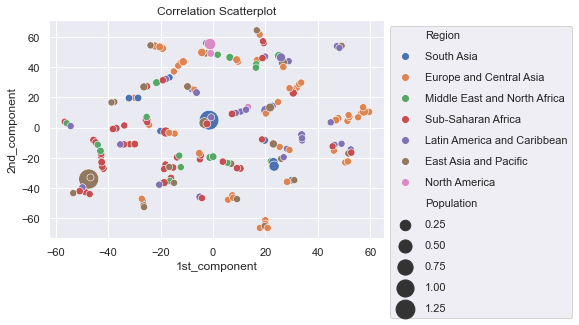

In [13]:
sns.set(rc={'figure.figsize':(7.5, 7.5)})

sns.scatterplot(data = new_df_tsne, x = '1st_component', y = '2nd_component', markers = 'Region', hue = 'Region', size = 'Population', sizes = (50, 400))

plt.legend(bbox_to_anchor=(1, 1), labelspacing = 1, loc=2)
plt.title('Correlation Scatterplot')
plt.show()

In [62]:
def group(row):
    list_c = ['Spain', 'China', 'Netherlands']

    if row.name in list_c:
        return 'Nope'
    else:
        return 'Yes'

In [64]:
test_df = new_df_tsne.copy()
#print(test_df.apply(lambda row: group(row), axis=1))
test_df['In list?'] = df.apply(lambda row: group(row), axis=1).convert_dtypes()

test_df

,,1st_component,2nd_component,Population,In list?
Country,Region,,,,
Afghanistan,South Asia,19.680162,-8.397316,38928341.0,<NA>
Albania,Europe and Central Asia,19.956909,-61.330254,2877800.0,<NA>
Algeria,Middle East and North Africa,6.426108,46.571262,43851043.0,<NA>
Andorra,Europe and Central Asia,5.759078,-47.756416,77265.0,<NA>
Angola,Sub-Saharan Africa,-36.89315,-0.449141,32866267.0,<NA>
...,...,...,...,...,...
Uzbekistan,Europe and Central Asia,-5.201609,-16.963957,33469199.0,<NA>
Vanuatu,East Asia and Pacific,-38.698132,16.69499,307150.0,<NA>
Yemen,Middle East and North Africa,-42.891441,-15.450199,29825968.0,<NA>


In [31]:
test_df = new_df_tsne.copy()

list_c = ['Spain', 'China', 'Netherlands']

conditions = [
  np.logical_and(test_df['1st_component'].gt(0), test_df['2nd_component'].gt(0))
]

outputs = ['Yes']

col = pd.Series(np.select(conditions, outputs, 'Nope'), dtype = str, name = 'col')
#print(pd.Series(np.select(conditions, outputs, 'Nope'), dtype = str))
print(pd.Series(np.select(conditions, outputs, 'Nope'), dtype = str).convert_dtypes())

test_df['col'] = (pd.Series(np.select(conditions, outputs, 'Nope'), dtype = str).convert_dtypes())

test_df = pd.concat([test_df, col], axis = 1, ignore_index = True)

#test_df['col'] = pd.Series(np.select(conditions, outputs, 'Nope'), dtype = str).convert_dtypes()
#test_df.join(col)
test_df

0      Nope
1      Nope
2       Yes
3      Nope
4      Nope
       ... 
174    Nope
175    Nope
176    Nope
177    Nope
178    Nope
Length: 179, dtype: string


NotImplementedError: Can only union MultiIndex with MultiIndex or Index of tuples, try mi.to_flat_index().union(other) instead.

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  0  0  0  0  0  0 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
179


Text(0.5, 1.0, 'OPTICS Clustering')

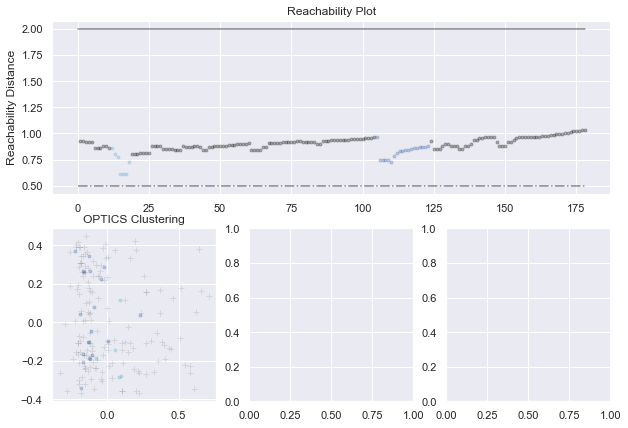

In [17]:


optics_model = OPTICS(min_samples = 5, xi = 0.05, min_cluster_size = 5)
optics_model.fit(df_normalized)

labels1 = cluster_optics_dbscan(reachability = optics_model.reachability_,
core_distances = optics_model.core_distances_,
ordering = optics_model.ordering_, eps = 0.5)

space = np.arange(len(df_normalized))
reachability = optics_model.reachability_[optics_model.ordering_]
labels = optics_model.labels_[optics_model.ordering_]
print(labels)
print(len(labels))

plt.figure(figsize = (10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])

# Plotting the Reachability-Distance Plot
colors = ['c.', 'b.', 'r.', 'y.', 'g.']
for Class, colour in zip(range(0, 5), colors):
    Xk = space[labels == Class]
    Rk = reachability[labels == Class]
    ax1.plot(Xk, Rk, colour, alpha = 0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha = 0.3)
ax1.plot(space, np.full_like(space, 2., dtype = float), 'k-', alpha = 0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype = float), 'k-.', alpha = 0.5)
ax1.set_ylabel('Reachability Distance')
ax1.set_title('Reachability Plot')
  
# Plotting the OPTICS Clustering
colors = ['c.', 'b.', 'r.', 'y.', 'g.']
for Class, colour in zip(range(0, 5), colors):
    Xk = df_normalized[optics_model.labels_ == Class]
    ax2.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3)
      
ax2.plot(df_normalized.iloc[optics_model.labels_ == -1, 0],
        df_normalized.iloc[optics_model.labels_ == -1, 1],
       'k+', alpha = 0.1)
ax2.set_title('OPTICS Clustering')
  

In [18]:
""" #MORRALLA

# K-MEANS CLUSTERING
# Importing Modules
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Loading dataset
iris_df = datasets.load_iris()

# Declaring Model
model = KMeans(n_clusters=3)

# Fitting Model
model.fit(iris_df.data)

# Predicitng a single input
predicted_label = model.predict([[7.2, 3.5, 0.8, 1.6]])

# Prediction on the entire data
all_predictions = model.predict(iris_df.data)

# Printing Predictions
print(predicted_label)
print(all_predictions)


# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :3]  # we only take the first two features.
y = iris.target


fig = plt.figure(figsize=(10,10))
plt = fig.add_subplot(111, projection='3d')
plt.scatter(X[:,0],X[:,1],X[:,2], 
            c=all_predictions, edgecolor='red', s=40, alpha = 0.5)
plt.set_title("First three PCA directions")
plt.set_xlabel("Educational_Degree")
plt.set_ylabel("Gross_Monthly_Salary")
plt.set_zlabel("Claim_Rate")
plt.dist = 10
plt

from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

model = KMeans()
res = model.fit_predict(df)

 """

' #MORRALLA\n\n# K-MEANS CLUSTERING\n# Importing Modules\nfrom sklearn import datasets\nfrom sklearn.cluster import KMeans\nimport matplotlib.pyplot as plt\nfrom sklearn.decomposition import PCA\n# Loading dataset\niris_df = datasets.load_iris()\n\n# Declaring Model\nmodel = KMeans(n_clusters=3)\n\n# Fitting Model\nmodel.fit(iris_df.data)\n\n# Predicitng a single input\npredicted_label = model.predict([[7.2, 3.5, 0.8, 1.6]])\n\n# Prediction on the entire data\nall_predictions = model.predict(iris_df.data)\n\n# Printing Predictions\nprint(predicted_label)\nprint(all_predictions)\n\n\n# import some data to play with\niris = datasets.load_iris()\nX = iris.data[:, :3]  # we only take the first two features.\ny = iris.target\n\n\nfig = plt.figure(figsize=(10,10))\nplt = fig.add_subplot(111, projection=\'3d\')\nplt.scatter(X[:,0],X[:,1],X[:,2], \n            c=all_predictions, edgecolor=\'red\', s=40, alpha = 0.5)\nplt.set_title("First three PCA directions")\nplt.set_xlabel("Educational_Degr